## EDA

In [2]:
import pandas as pd
import numpy as np
import re

from textblob import TextBlob, Word

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('df_final_with_no_numbers.csv')

### More EDA Questions to answer:

- How many papers per publication? (Remove lowest ones)
- Distribution of Claps, Responses, Reading time, writer followers, num_words, num_chars, polarity, subjectivity, weekday
- Correlation between these and claps (boxplots)
- Reading time vs Claps
- Remove Outliers:
    - Through quartile ranges
    - Through standard deviations
    - CHECK Housing Data Project for third approach


------ Most Outliers Removed -------


- How many papers per publication
- How many articles per writer
- Average length of text per publication
- Engagement per publication, ie claps and responses
- Engagement per writer, ie claps and responses
- Articles per weedays


- Word cloud - Words used:
    - Word Cloud Global
    - wordcloud per publication

- Percentage of Claps in lower Q, med, high Q ...
- Binary Claps by Median

- Average number of words per quartile claps
- Distribution of polarity and Other column through articles
- Polarity per publication or polarity per Topic modelling

In [4]:
df.publication.unique()

array(['towardsdatascience', 'swlh', 'writingcooperative',
       'datadriveninvestor', 'uxdesign', 'the-mission', 'personal-growth',
       'startup-grind', 'uxplanet', 'better-humans', 'better-marketing'],
      dtype=object)

In [5]:
pub_followers = {
                'towardsdatascience': 634000, 'swlh': 759000, 'writingcooperative': 239000 ,
                'datadriveninvestor': 57000 , 'uxdesign':443000 , 'the-mission': 46000, 'personal-growth': 12000 ,
                'startup-grind': 437000, 'uxplanet': 313000, 'better-humans':387000, 'better-marketing': 116000
                }

In [6]:
df.subtitle = df.subtitle.apply(lambda x: 0 if x == '-' else 1)

In [7]:
df = df[df.publication == 'towardsdatascience']
df.reset_index(inplace=True, drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27195 entries, 0 to 27194
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  27195 non-null  object 
 1   title                 27195 non-null  object 
 2   subtitle              27195 non-null  int64  
 3   claps                 27195 non-null  float64
 4   responses             27195 non-null  int64  
 5   author_handle         27195 non-null  object 
 6   story_url             27195 non-null  object 
 7   reading_time          27195 non-null  int64  
 8   text                  27195 non-null  object 
 9   author_followers      27195 non-null  float64
 10  publication           27195 non-null  object 
 11  number_of_words       27195 non-null  int64  
 12  number_of_characters  27195 non-null  int64  
 13  day_of_the_week       27195 non-null  int64  
 14  month                 27195 non-null  int64  
 15  polarity           

Make subtitle binary

In [9]:
df.subtitle.value_counts()

1    23133
0     4062
Name: subtitle, dtype: int64

In [10]:
df.month = df.month.apply(str)
df.day_of_the_week = df.day_of_the_week.apply(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27195 entries, 0 to 27194
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  27195 non-null  object 
 1   title                 27195 non-null  object 
 2   subtitle              27195 non-null  int64  
 3   claps                 27195 non-null  float64
 4   responses             27195 non-null  int64  
 5   author_handle         27195 non-null  object 
 6   story_url             27195 non-null  object 
 7   reading_time          27195 non-null  int64  
 8   text                  27195 non-null  object 
 9   author_followers      27195 non-null  float64
 10  publication           27195 non-null  object 
 11  number_of_words       27195 non-null  int64  
 12  number_of_characters  27195 non-null  int64  
 13  day_of_the_week       27195 non-null  object 
 14  month                 27195 non-null  object 
 15  polarity           

In [12]:
df.head()

date                                              title  subtitle  \
0  01/01/2020               making python program blazingly fast         1   
1  01/01/2020  implementing fully convolutional network fcn t...         1   
2  01/01/2020                   new feature python python newbie         1   
3  01/01/2020                                       fancy python         1   
4  01/01/2020  scratch search playing data elasticsearch inge...         1   

    claps  responses      author_handle  \
0  3400.0          3      @martin.heinz   
1   543.0          4   @himanshurawlani   
2  1800.0          4            @edenau   
3  1700.0         12           @dipam44   
4   239.0          1  @stanislavprihoda   

                                           story_url  reading_time  \
0  https://towardsdatascience.com/making-python-p...             5   
1  https://towardsdatascience.com/implementing-a-...            11   
2  https://towardsdatascience.com/6-new-features-...             4   
3  https://towardsdatascience.com/how-to-be-fancy...             5   
4  https://towardsdatascience.com/from-scratch-to...             9   

                                                text  author_followers  \
0  making python program blazingly fast let look ...            3800.0   
1  understanding implementing fully convolutional...             331.0   
2  python beginner new feature python python newb...            1700.0   
3  fancy python python cool really cool however l...             625.0   
4  scratch search playing data elasticsearch inge...              88.0   

          publication  number_of_words  number_of_characters day_of_the_week  \
0  towardsdatascience             1056                  6175               2   
1  towardsdatascience             2527                 15729               2   
2  towardsdatascience              712                  4174               2   
3  towardsdatascience              607                  3328               2   
4  towardsdatascience             2158                 14087               2   

  month  polarity  subjectivity  
0     1  0.049713      0.407731  
1     1  0.110434      0.398271  
2     1  0.081111      0.470741  
3     1  0.209636      0.480786  
4     1  0.090842      0.435970

-------

In [13]:
fig, ax = plt.subplots(figsize=(18,12))

mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Heatmap of correlations of numerical values')
sns.heatmap(df.corr(), annot=True, fmt='.3f', ax=ax, mask=mask, cmap='coolwarm')
plt.show()

## Scatter plots for features agaisnt Claps

In [14]:
def plot_scatter(df, y):
    for i in range(len(df.columns)):
        if df[df.columns[i]].dtype !=  'O':
            plt.figure(figsize=(8,6))
            plt.xlabel(df.columns[i])
            plt.title(f'Scatter Plot of {df.columns[i]} against Target')
            sns.scatterplot(x = df[df.columns[i]], y=y, data=df)
            plt.show()

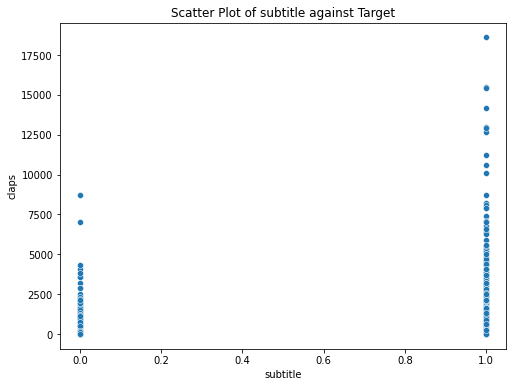

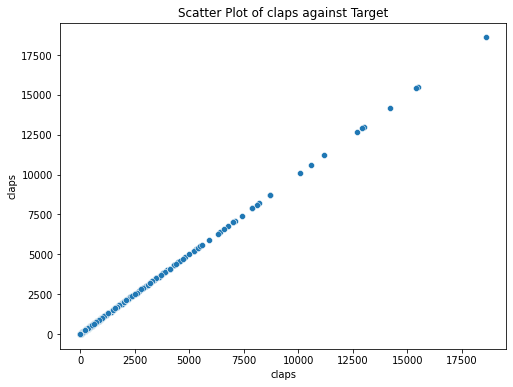

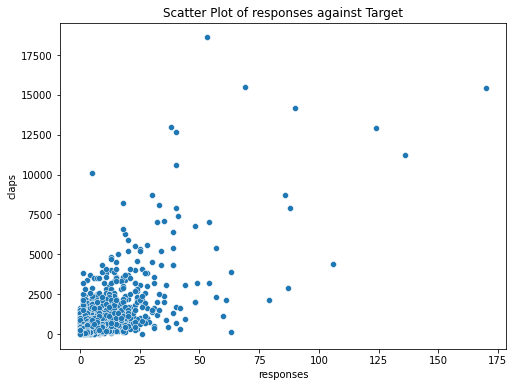

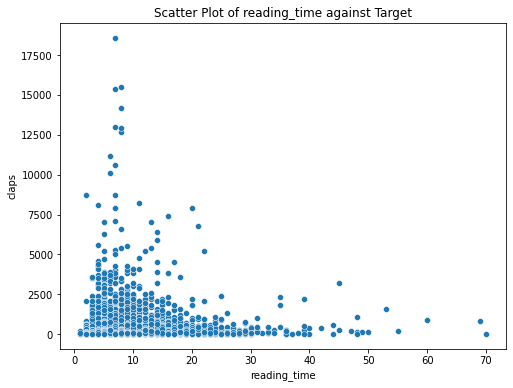

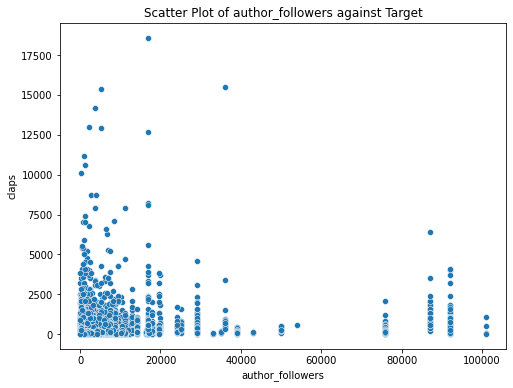

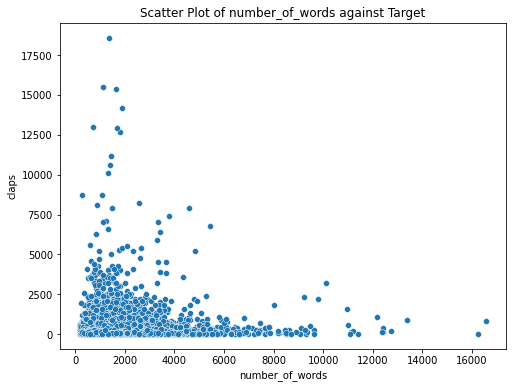

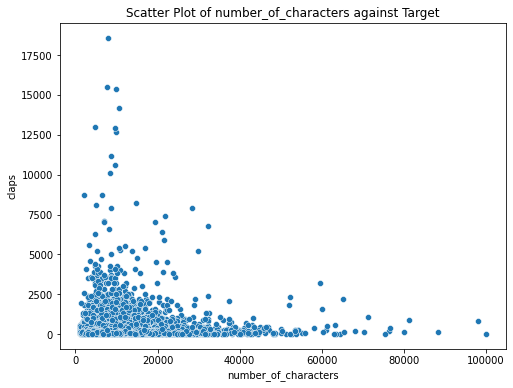

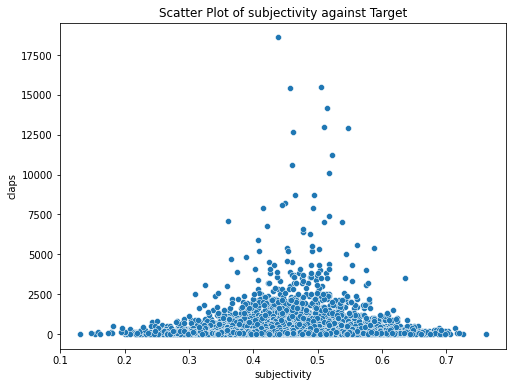

In [15]:
plot_scatter(df, df['claps'])

## Removing some outliers

Limiting claps at 30k for now as well as reading time under 100 minutes

In [16]:
df = df[(df.reading_time < 100) & (df.claps <= 10000) & (df.author_followers < 10000)]

In [17]:
claps = df['claps']

lq = claps.quantile(0.25)
uq = claps.quantile(0.75)
iqr = claps.quantile(0.75)-claps.quantile(0.25)

print(f'Lower Quartile --> {lq}')
print(f'Upper Quartile --> {uq}')
print(f'IQR --> {iqr}')

print('Upper Bound', uq + iqr*1.5)
print('Lower Bound', lq-iqr*1.5)

Lower Quartile --> 29.0
Upper Quartile --> 175.0
IQR --> 146.0
Upper Bound 394.0
Lower Bound -190.0


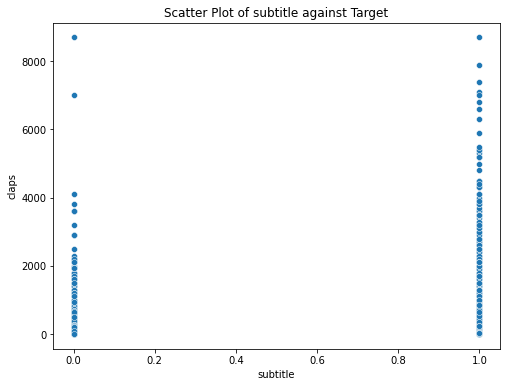

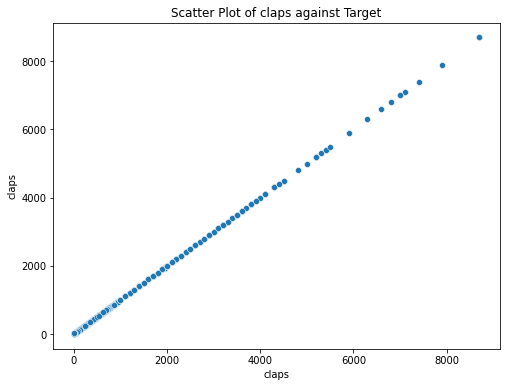

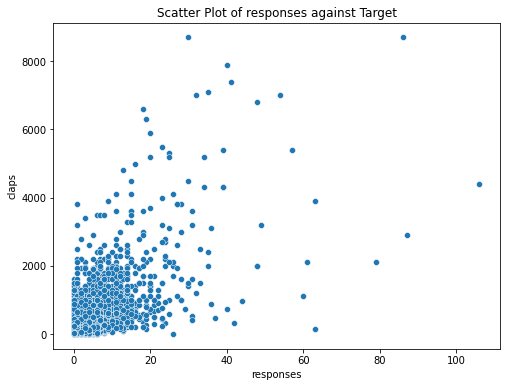

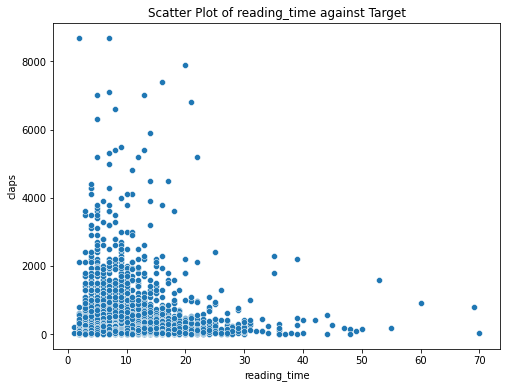

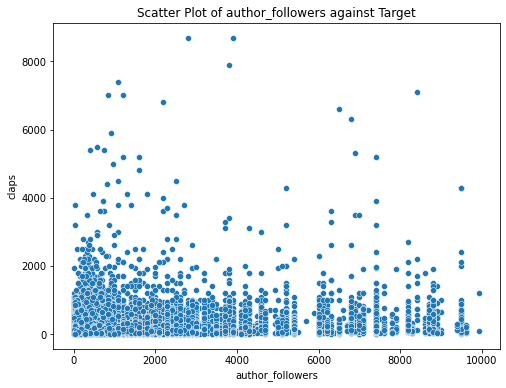

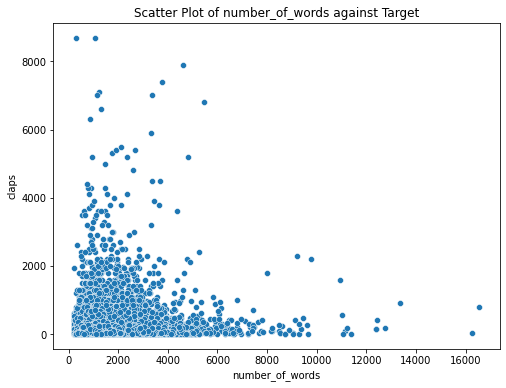

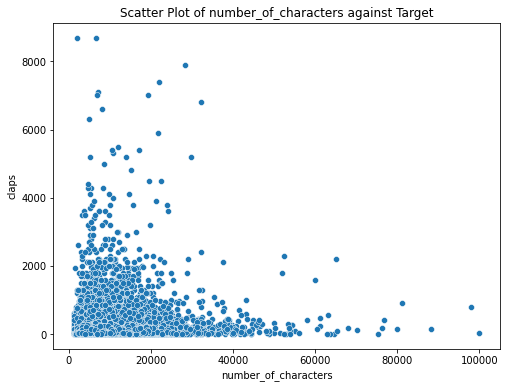

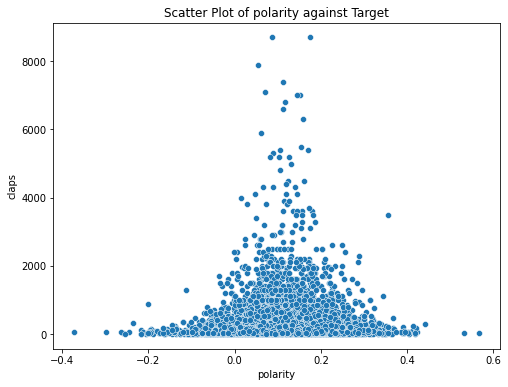

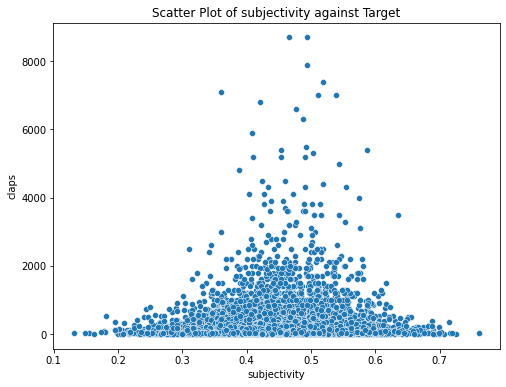

In [18]:
plot_scatter(df, df['claps'])

### Deeper vew of some Scatter plots

In [19]:
fig = px.scatter(df,y='claps', x='reading_time', title='Read time vs Claps', opacity=0.7)
fig.show()

In [20]:
fig = px.scatter(df,y='claps', x='subjectivity', title='Subjectivty vs Claps', opacity=0.7)
fig.show()

In [21]:
fig = px.scatter(df,y='claps', x='number_of_words', title='Number of Words vs Claps', opacity=0.7)
fig.show()

----

## Histograms

### Claps

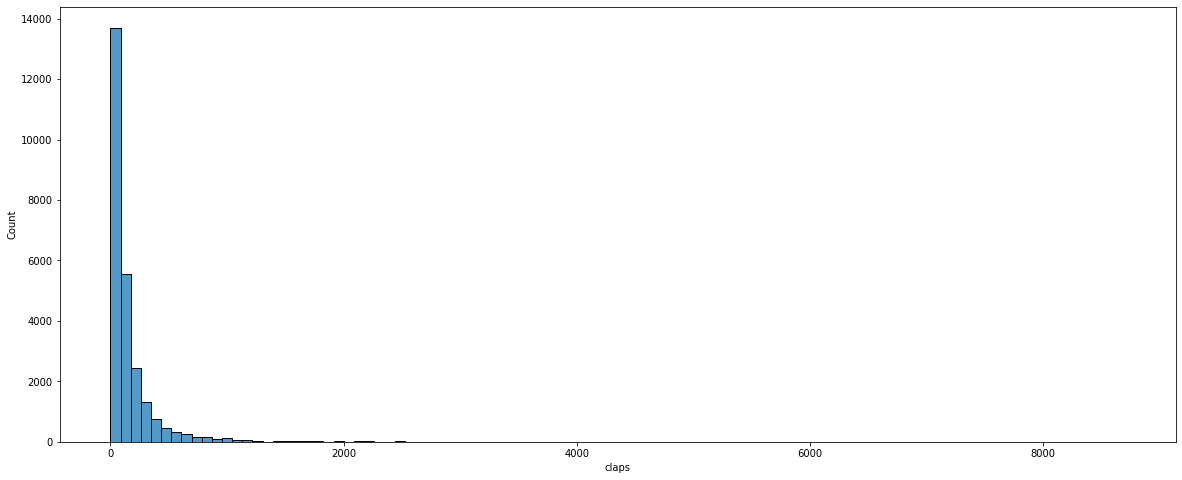

In [22]:
plt.figure(figsize=(20,8))
sns.histplot(df.claps, bins=100);

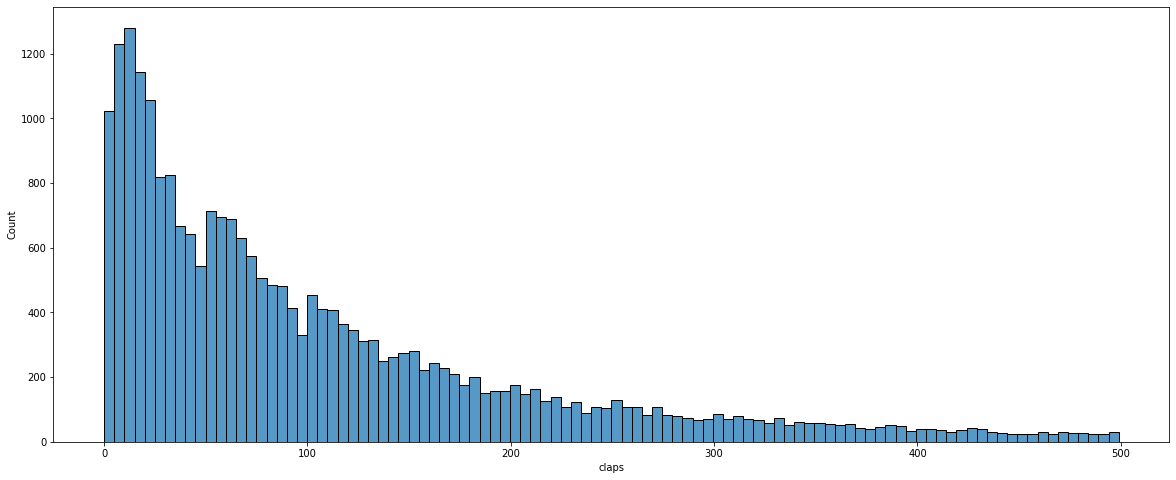

In [23]:
plt.figure(figsize=(20,8))
sns.histplot(df[df.claps < 500]['claps'], bins=100);

### Responses

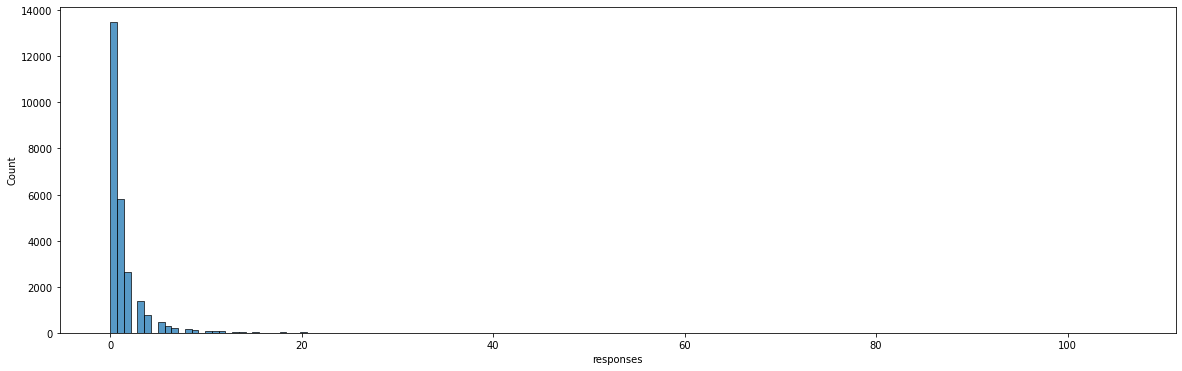

In [24]:
plt.figure(figsize=(20,6))
sns.histplot(df.responses, bins=150);

### Reading time

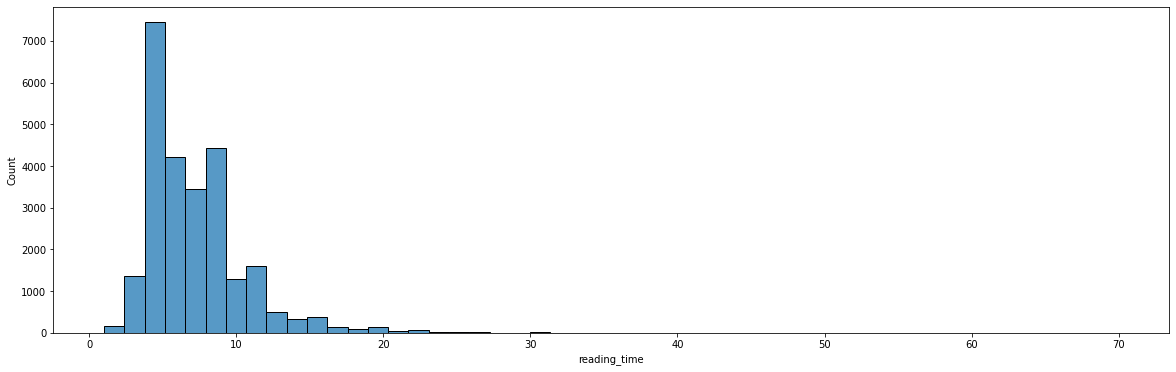

In [25]:
plt.figure(figsize=(20,6))
sns.histplot(df['reading_time'], bins=50);

### Author followers

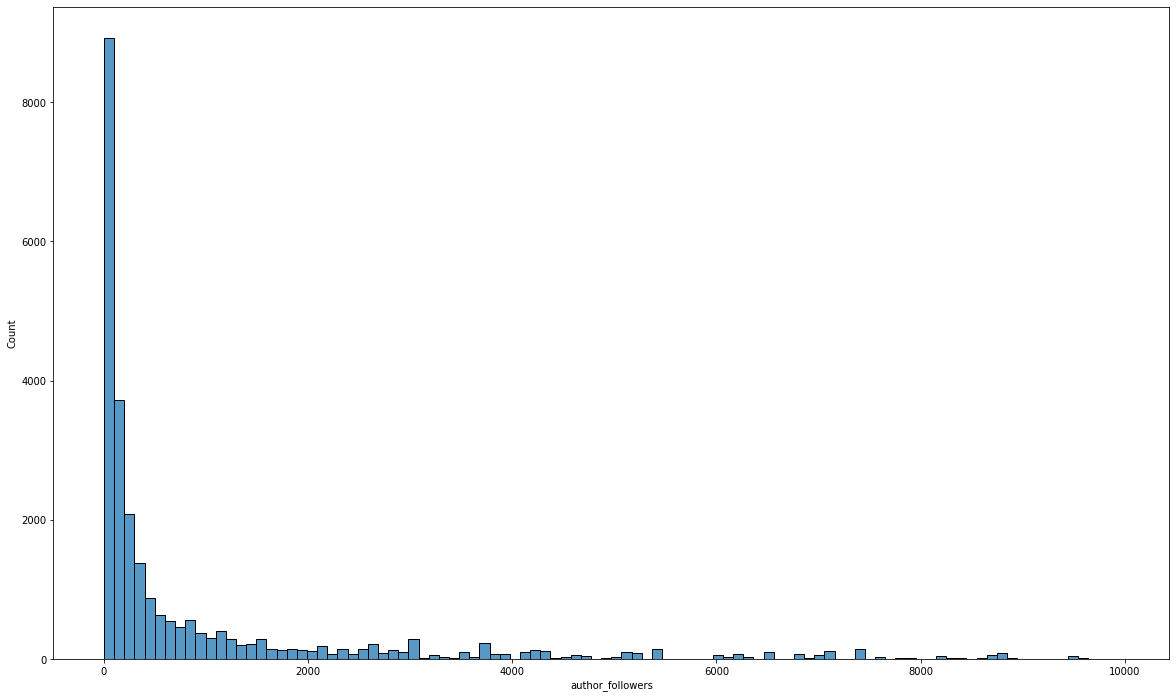

In [26]:
plt.figure(figsize=(20,12))
sns.histplot(df[df['author_followers'] < 10000]['author_followers'], bins=100);

### Word Count

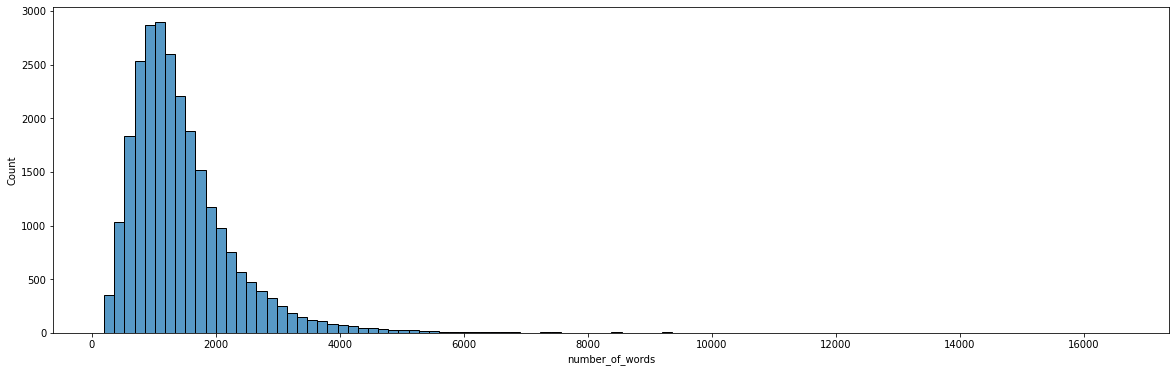

In [27]:
plt.figure(figsize=(20,6))
sns.histplot(df['number_of_words'], bins=100);

### Distribution of polarity and Subjectivity by articles

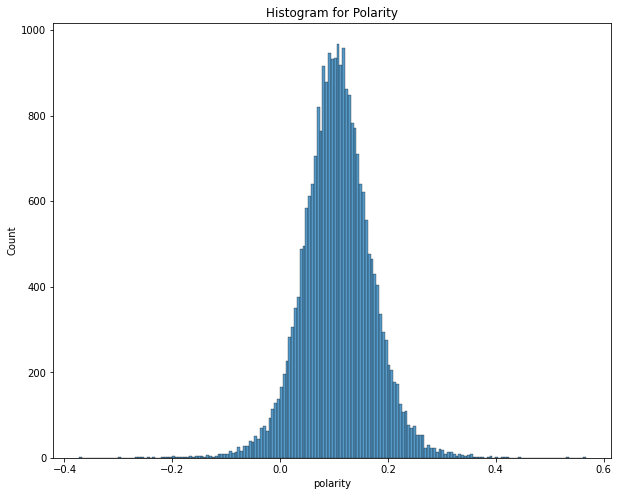

In [28]:
plt.figure(figsize=(10,8))
plt.title('Histogram for Polarity')
sns.histplot(df.polarity);

### Distribution of polarity and Subjectivity by Claps quartiles

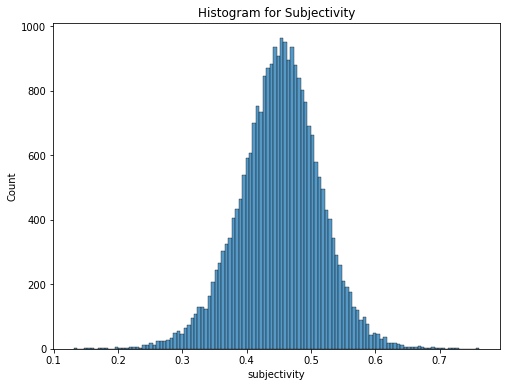

In [29]:
plt.figure(figsize=(8,6))
plt.title('Histogram for Subjectivity')
sns.histplot(df.subjectivity);

------------

## How many articles per writer

In [30]:
print(f'There are {len(df.author_handle.unique())} unique writers')

There are 8146 unique writers


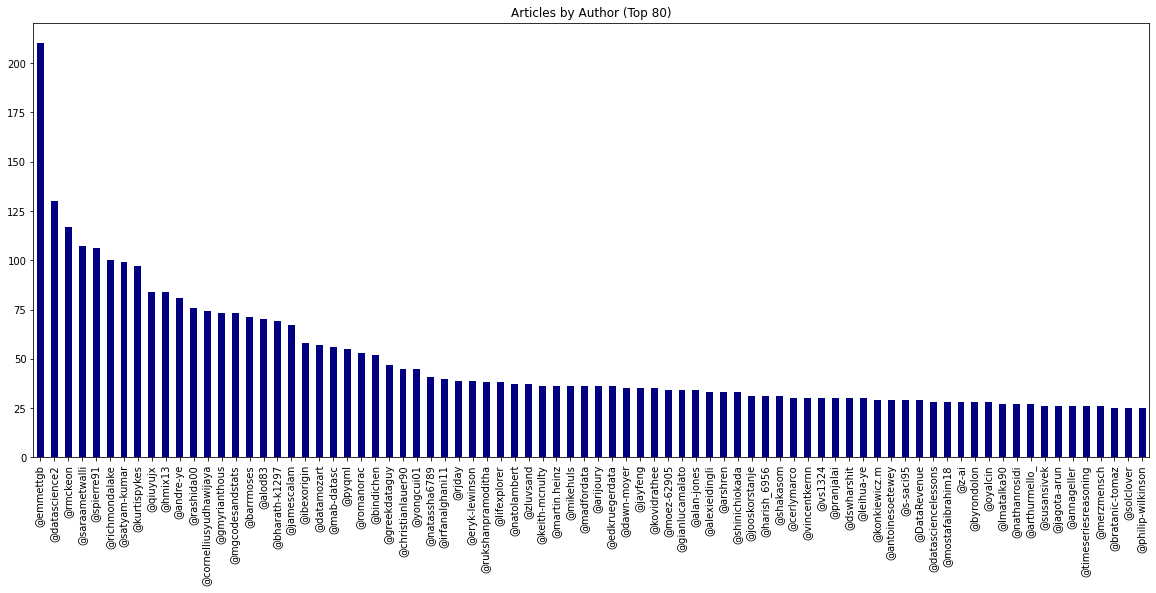

In [31]:
plt.figure(figsize=(20,8))
plt.title('Articles by Author (Top 80)')
df.author_handle.value_counts()[:80].plot(kind='bar', colormap='jet');

In [32]:
author_df = pd.DataFrame(df.groupby('author_handle')['text'].count())
author_df[author_df['text'] == 1]

text
author_handle       
@117361441         1
@1549450275422     1
@3apt              1
@418akash          1
@5amfung           1
...              ...
@ztalib            1
@zubair0           1
@zwrankin          1
@zxiao2015         1
@zyan5             1

[4003 rows x 1 columns]

--------

### Word Clouds

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [34]:
text = " ".join(article for article in df.text)
print ("There are {} words combined.".format(len(text.split())))

There are 20614041 words combined.


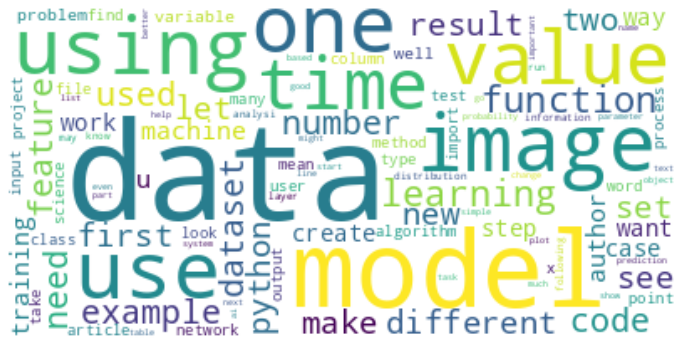

In [35]:
# Generate a word cloud image
wordcloud = WordCloud(collocations = False, max_words=100, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

----------

### Creating new column of claps per quartile

In [36]:
def claps_per_quartile(x):
   
    low_q = df.claps.quantile(0.25)
    median = df.claps.quantile(0.5)
    high_q = df.claps.quantile(0.75)

    if x < low_q:
        return 0
    if low_q <= x < median:
        return 1
    if median <= x < high_q:
        return 2
    if high_q <= x:
        return 3

In [37]:
df['claps_per_quartile'] = df.claps.apply(claps_per_quartile)

### Creating new Binary column of Claps by Median

In [38]:
def claps_binary(x):

    median = df.claps.quantile(0.5)
    
    if x < median:
        return 0
    else:
        return 1

In [39]:
df['claps_binary'] = df.claps.apply(claps_binary)

### Analysis by Quartile

In [40]:
df.groupby('claps_per_quartile')['reading_time'].mean()

claps_per_quartile
0    6.741355
1    7.000311
2    7.284394
3    7.879858
Name: reading_time, dtype: float64

In [41]:
df.groupby('claps_per_quartile')['author_followers'].mean()

claps_per_quartile
0     473.992802
1     737.043796
2    1041.794177
3    1578.194767
Name: author_followers, dtype: float64

In [42]:
df.groupby('claps_per_quartile')['reading_time'].mean()

claps_per_quartile
0    6.741355
1    7.000311
2    7.284394
3    7.879858
Name: reading_time, dtype: float64

In [43]:
df.groupby('claps_per_quartile')['responses'].mean()

claps_per_quartile
0    0.305586
1    0.603199
2    1.050069
3    3.301595
Name: responses, dtype: float64

--------

In [44]:
df['text']

0        making python program blazingly fast let look ...
1        understanding implementing fully convolutional...
2        python beginner new feature python python newb...
3        fancy python python cool really cool however l...
4        scratch search playing data elasticsearch inge...
                               ...                        
27190    layerwise relevance propagation explaining neu...
27191    photo iryna drozd canva mindful data scientist...
27192    machine learning medicine part v handson intro...
27193    opinion future data engineer data engineer sti...
27194    said let jump d world know model learn master ...
Name: text, Length: 25780, dtype: object

------

------

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [45]:
cvec = CountVectorizer(max_features=150000, ngram_range=(1,2))
tfidf = TfidfVectorizer(max_features=150000, ngram_range=(1,2))

In [46]:
X = df['text']
y = df.claps_binary

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [48]:
print(X_train.shape)
print(X_test.shape)

(20624,)
(5156,)


In [49]:
# with n_grams 1 & 2
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(20624, 150000)
(5156, 150000)


In [50]:
# Transform parse matrix into a df
text_train = pd.DataFrame(X_train.toarray(),
                  columns=tfidf.get_feature_names())
text_test = pd.DataFrame(X_test.toarray(),
                  columns=tfidf.get_feature_names())

/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [51]:
text_train

aa  aa bb  aa test  aaa  aaai  aac  aad  aal  aapl  aardvark  ...  \
0      0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
1      0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
2      0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
3      0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
4      0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
...    ...    ...      ...  ...   ...  ...  ...  ...   ...       ...  ...   
20619  0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
20620  0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
20621  0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
20622  0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   
20623  0.0    0.0      0.0  0.0   0.0  0.0  0.0  0.0   0.0       0.0  ...   

       ztest  zuckerberg  zurich  zuserage  zvalue  zvec   zw   zx  zynga   zz  
0        0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
1        0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
2        0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
3        0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
4        0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
...      ...         ...     ...       ...     ...   ...  ...  ...    ...  ...  
20619    0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
20620    0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
20621    0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
20622    0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  
20623    0.0         0.0     0.0       0.0     0.0   0.0  0.0  0.0    0.0  0.0  

[20624 rows x 150000 columns]

-------

In [51]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

## Classification just text NLP

In [53]:
### With some outliers removed plus n
model = MultinomialNB()
model.fit(text_train, y_train)

print("train score:", model.score(text_train, y_train))
print("test score:", model.score(text_test, y_test))

train score: 0.752666795965865
test score: 0.6064778898370831


#### Score with cvec
train score: 0.7729829325058185
test score: 0.6080294802172227

In [54]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

plot_confusion_matrix(model,text_test, y_test, cmap='Blues', labels=[0, 1], values_format='.0f')
plt.show()

/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



FP rate is really high, much higher than False Neg

In [55]:
predictions = model.predict(text_test)

print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.6300    0.5070    0.5619      2566
           1     0.5907    0.7050    0.6428      2590

    accuracy                         0.6065      5156
   macro avg     0.6104    0.6060    0.6024      5156
weighted avg     0.6103    0.6065    0.6025      5156



--------

In [56]:
df.columns

Index(['date', 'title', 'subtitle', 'claps', 'responses', 'author_handle',
       'story_url', 'reading_time', 'text', 'author_followers', 'publication',
       'number_of_words', 'number_of_characters', 'day_of_the_week', 'month',
       'polarity', 'subjectivity', 'claps_per_quartile', 'claps_binary'],
      dtype='object')

#### Is it significant that the title and the text columns are not joined? ie id I run Nlp on both title and text columns, does the model later know that some of the words belong to the title and others to the text?

### I didn't standardize some of the columns

In [45]:
df.subtitle = df.subtitle.apply(str)

In [48]:
df_sample = df.sample(10000)

In [49]:
y = df_sample.claps_binary
X = df_sample[['number_of_characters', 'polarity', 'subjectivity', 'author_followers', 'text', 'subtitle']]
X = pd.get_dummies(X, columns=['subtitle'], drop_first=True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 6) (8000,)
(2000, 6) (2000,)


In [54]:
X_train_for_NLP = X_train.pop('text')
X_test_for_NLP = X_test.pop('text')

In [55]:
# create a tf-idf vectorizer object
# tfidf = TfidfVectorizer(max_features=100000, ngram_range=(1,2))
cvec = CountVectorizer(max_features=100000, ngram_range=(1,2))

In [56]:
X_train_text = cvec.fit_transform(X_train_for_NLP)
X_test_text = cvec.transform(X_test_for_NLP)

In [57]:
train_text = pd.DataFrame(((X_train_text).toarray()),
                  columns=cvec.get_feature_names())

test_text = pd.DataFrame(((X_test_text).toarray()),
                  columns=cvec.get_feature_names())

print(train_text.shape)
print(test_text.shape)

/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



(8000, 100000)
(2000, 100000)


/Users/ariklevy/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [58]:
df_train = pd.concat([train_text, X_train.reset_index(drop=True)], axis=1)
df_test = pd.concat([test_text, X_test.reset_index(drop=True)], axis=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random_forest_model_basic = RandomForestClassifier(random_state=42, n_jobs=6)

random_forest_model_basic.fit(df_train, y_train)

cv = cross_val_score(random_forest_model_basic, df_train, y_train, cv=5)

print('Training Score:', random_forest_model_basic.score(df_train, y_train))
print('Test Score:',random_forest_model_basic.score(df_test, y_test))
print('Cross Validation Score:', cv)
print('Mean cross Validation Score:',cv.mean())
print('Standard Deviation of Cross Validation Score:',cv.std())

Training Score: 1.0
Test Score: 0.602
Cross Validation Score: [0.59875  0.60875  0.596875 0.59125  0.614375]
Mean cross Validation Score: 0.602
Standard Deviation of Cross Validation Score: 0.008379662881047169


In [ ]:
# Cycle through all the words in the english language
# remove all the numbers
# potentially leave some symbols in